In [1]:
import pandas as pd
import community
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
from plotly_helpers import *
import credentials

In [2]:
df_emails = pd.read_csv('hillary-clinton-emails/emails.csv')
df_aliases = pd.read_csv('hillary-clinton-emails/Aliases.csv')
df_emails_receivers = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')

In [3]:
#TODO check Pandas Join
edges = []
for index, row in df_emails.iterrows():
    emailId, senderId = row[['Id', 'SenderPersonId']]
    
    receiversId = []
    for index, row in df_emails_receivers[df_emails_receivers['EmailId'] == emailId].iterrows():
        receiversId.append(df_aliases[df_aliases['PersonId'] == row['PersonId']]['PersonId'].iloc[0])
    if(np.isnan(senderId)):
        senderId = -1
        
    edges.append(((int)(senderId), receiversId))

In [4]:
G = nx.Graph()

for sender, receivers in edges:
    for receiver in receivers:
        G.add_edge(sender, receiver)

pos=nx.fruchterman_reingold_layout(G) 
labels = []
for k in pos.keys():
    if(k == -1):
        labels.append('Unknown')
    else:
        labels.append(df_aliases[df_aliases['PersonId'] == k].Alias.values[0])

In [5]:
trace1 = scatter_edges(G, pos)
trace2 = scatter_nodes(pos, labels=labels)


width=500
height=500
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )
layout=Layout(title= 'Emails connection network',  #
    font= Font(),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
        pad=0,
       
    ),
    hovermode='closest',
    plot_bgcolor='#EFECEA', #set background color            
    )


data=Data([trace1, trace2])

fig = Figure(data=data, layout=layout)

#fig['layout'].update(annotations=make_annotations(pos, [str(k) for k in range(len(pos.keys()))])) 
py.sign_in(credentials.USERNAME, credentials.API_KEY)
py.iplot(fig, filename='tst')

In [6]:
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]

#nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 20, with_labels=False)
#plt.show()

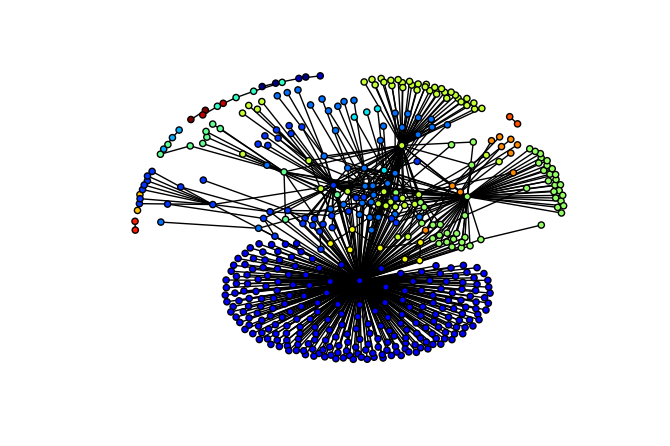

In [7]:
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 20, with_labels=False)
plt.show()

In [8]:
print(values)

[0, 1, 2, 3, 4, 2, 4, 2, 5, 2, 6, 7, 8, 6, 2, 9, 10, 4, 2, 2, 7, 2, 1, 10, 2, 10, 2, 10, 2, 2, 3, 3, 2, 2, 9, 5, 11, 2, 2, 2, 4, 2, 12, 8, 4, 9, 10, 4, 3, 2, 2, 10, 2, 2, 8, 8, 2, 3, 8, 2, 9, 2, 4, 3, 5, 2, 3, 2, 10, 3, 3, 3, 10, 2, 10, 2, 2, 2, 11, 4, 9, 13, 14, 15, 2, 2, 11, 3, 10, 13, 9, 15, 2, 2, 2, 9, 2, 10, 12, 10, 2, 9, 2, 2, 2, 4, 9, 4, 9, 11, 11, 10, 2, 3, 4, 11, 4, 10, 2, 2, 2, 10, 2, 2, 16, 8, 2, 9, 9, 4, 10, 2, 17, 4, 3, 4, 4, 2, 17, 4, 2, 2, 10, 2, 2, 4, 2, 2, 2, 4, 10, 2, 9, 0, 10, 2, 2, 10, 8, 3, 9, 10, 2, 2, 4, 3, 2, 3, 3, 7, 8, 3, 13, 0, 4, 14, 4, 8, 2, 3, 2, 2, 9, 2, 2, 2, 9, 10, 4, 4, 4, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 10, 2, 9, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 9, 2, 9, 9, 9, 2, 2, 2, 2, 2, 2, 10, 2, 2, 2, 2, 10, 2, 2, 2, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 9, 2, 10, 2, 2, 2, 2, 2, 2, 2, 2, 

In [9]:
trace1 = scatter_edges(G, pos)
trace2 = scatter_nodes(pos, labels=labels, color=values)


width=500
height=500
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )
layout=Layout(title= 'Emails community network',  #
    font= Font(),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
        pad=0,
       
    ),
    hovermode='closest',
    plot_bgcolor='#EFECEA', #set background color            
    )


data=Data([trace1, trace2])

fig = Figure(data=data, layout=layout)

#fig['layout'].update(annotations=make_annotations(pos, [str(k) for k in range(len(pos.keys()))])) 
py.iplot(fig, filename='tst2')